In [2]:
Answer all questions and submit them either as an IPython notebook, LaTeX document, or Markdown document. Each question is worth 25 points.

This homework is due Friday, October 9, 2015.

SyntaxError: invalid syntax (<ipython-input-2-4c923bc35681>, line 1)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## Question 1

The data below provides counts of a flour beetle (Tribolium confusum) population at various points in time:

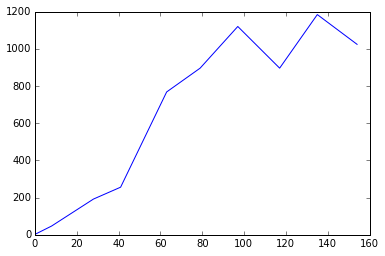

In [4]:
days = 0,8,28,41,63,79,97,117,135,154
beetles = 2,47,192,256,768,896,1120,896,1184,1024

plt.plot(days, beetles)

An elementary model for population growth is the logistic model:

$$\frac{dN}{dt} = rN\left(1 - \frac{N}{K}\right)$$

where $N$ is population size, $t$ is time, $r$ is a growth rate parameter, and $K$ is a parameter that represents the population carrying capacity of the environment. The solution to this differential equation is given by: 

$$N_t = f(t) = \frac{KN_0}{N_0 + (K - N_0)\exp(-rt)}$$

where $N_t$ denotes the population size at time $t$. 

1. Fit the logistic growth model to the flour beetle data using optimization to minimize the sum of squared errors between model predictions and observed counts.

2. In many population modeling applications, an assumption of lognormality is adopted. The simplest assumption would be that the $\log(N_t)$ are independent and normally distributed with mean $\log[f(t)]$ and variance $\sigma^2$. Find the MLEs under this assumption, and provide estimates of standard errors and correlation between them.


## Solutions:
1. 
A. As we could see from the following that huge temperture drop will increase the speed of convergence. Longer duration could also be helpful in seearching the minimum. But huge temperature drop may cause finding local minimum and too long duration will affect the efficiency.
B. neighbor of 2 is better than that of 3. There is a balance between efficiency and effectness.


2. 
A. higher Mutation rate will increase the convergence speed.
B. larger generation size could have more good candidates.


##########################################
##########################################
############     PART ONE    #############
##########################################
##########################################


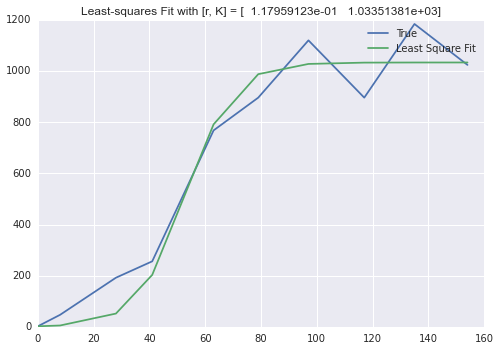

##########################################
##########################################
############     PART TWO    #############
##########################################
##########################################
 message: 'Optimization terminated successfully.'
     nit: 102
 success: True
    nfev: 185
  status: 0
     fun: -5.6008857865638467e-05
       x: array([  1.92620494e-01,   8.20358498e+02,   6.44076102e-01])


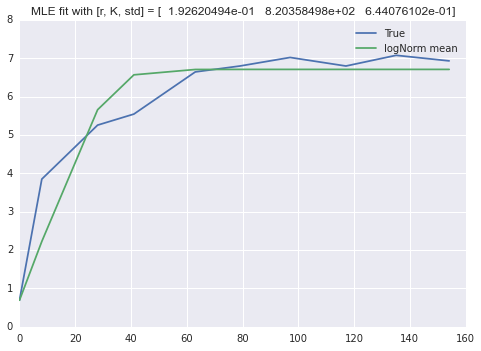

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sy

from scipy.optimize import leastsq, minimize
import scipy.stats as st

### data ###
days = np.array([0,8,28,41,63,79,97,117,135,154])
beetles = np.array([2,47,192,256,768,896,1120,896,1184,1024])

### Part 1. by least square ###
print('##########################################')
print('##########################################')
print('############     PART ONE    #############')
print('##########################################')
print('##########################################')

t = days
N_meas = beetles
N_0 = N_meas[0]

def residuals(p, N_meas, t):
    r, K = p
    err = N_meas - (K * N_0 / (N_0 + (K - N_0) * np.exp(-r * t)))
    
    return err

# initial
p_0 = [0.7, 10000] # selected after a couple of tests

# opt
plsq = leastsq(residuals, p_0, args = (N_meas, t))
r, K = plsq[0]
N_fit = (K * N_0 / (N_0 + (K - N_0) * np.exp(-r * t)))

plt.plot(t, N_meas, t, N_fit)
plt.title('Least-squares Fit with [r, K] = {0}'.format(plsq[0]))
plt.legend(['True', 'Least Square Fit'])
plt.show()


### Part 2. by MLE on logNormal ###
print('##########################################')
print('##########################################')
print('############     PART TWO    #############')
print('##########################################')
print('##########################################')

logN_meas = np.log(N_meas)
p_0 = [0.1, 1000, 0.5]

def f(p, logN_meas, t):
    
    
    r, K, std = p
    
    logN_mu = np.log((K * N_0 / (N_0 + (K - N_0) * np.exp(-r * t))))
    
    likeli = np.product(st.norm(logN_mu, std).pdf(logN_meas))* -1
    
    return likeli



pred = minimize(f, p_0, args = (logN_meas, t), method='Nelder-Mead')
print(pred)

[r, K, std] = pred.x

logN_fit = f(pred.x, logN_meas, t)
logN_mu = np.log((K * N_0 / (N_0 + (K - N_0) * np.exp(-r * t))))

plt.plot(t, logN_meas, t, logN_mu)
plt.title('MLE fit with [r, K, std] = {0}'.format(pred.x))
plt.legend(['True', 'logNorm mean'])
plt.show()




## Question 2

1. Implement simulated annealing for minimizing the AIC for the baseball salary regression problem. Model your algorithm on the example given in class. 

    1. Compare the effects of different cooling schedules (different temperatures and different durations at each temperature).  
    2. Compare the effect of a proposal distribution that is discrete uniform over 2-neighborhoods versus one that is discrete uniform over 3-neighborhoods.

2. Implement a genetic algorithm for minimizing the AIC for the baseball salary regression problem. Model your algorithm on Example 3.5. 

    1. Compare the effects of using different mutation rates.  
    2. Compare the effects of using different generation sizes.  
    3. Instead of the selection mechanism used in the class example, try using independent selection of both parents with probabilities proportional to their fitness.


## Solutions:


##########################################
##########################################
############     PART ONE    #############
##########################################
##########################################
---------------------------------------------------------------------------------
---------------------------      Part A      ------------------------------------
---------------------------------------------------------------------------------
##########################################
############     CASE ONE    #############
##########################################
The number of periods is 15
The temperature profile is [10.0, 9.0, 8.100000000000001, 7.290000000000001, 6.561, 5.9049000000000005, 5.3144100000000005, 4.7829690000000005, 4.304672100000001, 3.874204890000001, 3.486784401000001, 3.138105960900001, 2.824295364810001, 2.5418658283290005, 2.287679245496101]


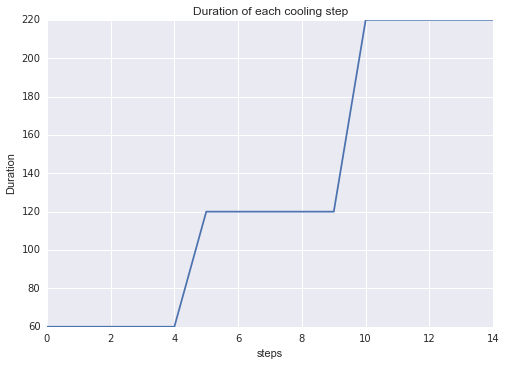

Best AIC: -415.46597733749775
Best solution: (array([ 0,  2,  5,  7,  9, 12, 13, 14, 15, 18, 21, 23, 24, 25]),)
Discovered at iteration 1459


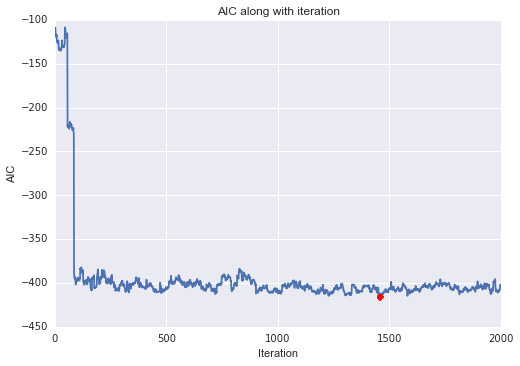

##########################################
############     CASE TWO    #############
##########################################
The number of periods is 15
The temperature profile is [50.0, 45.0, 40.5, 36.45, 32.805, 29.524500000000003, 26.572050000000004, 23.914845000000003, 21.523360500000006, 19.371024450000004, 17.433922005000007, 15.690529804500002, 14.121476824050006, 12.709329141645004, 11.438396227480505]


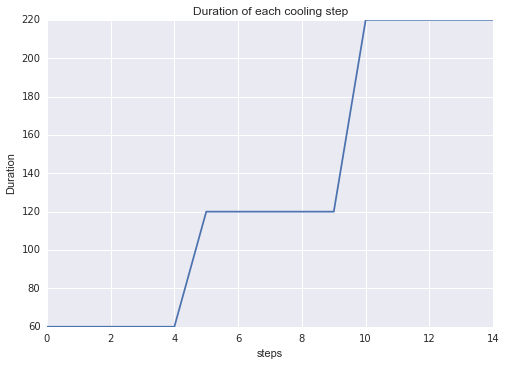

Best AIC: -412.9387850113487
Best solution: (array([ 2,  4,  5,  7,  9, 12, 13, 19, 20, 21, 22, 23]),)
Discovered at iteration 1360


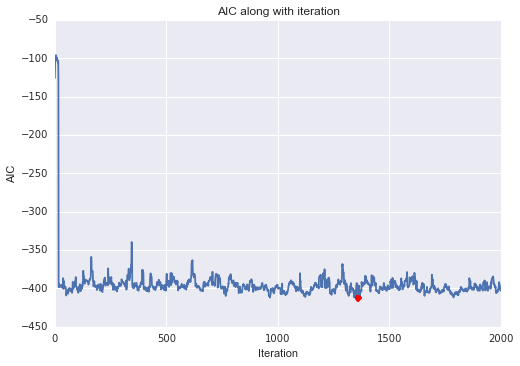

##########################################
############    CASE THREE   #############
##########################################
The number of periods is 15
The temperature profile is [10.0, 9.0, 8.100000000000001, 7.290000000000001, 6.561, 5.9049000000000005, 5.3144100000000005, 4.7829690000000005, 4.304672100000001, 3.874204890000001, 3.486784401000001, 3.138105960900001, 2.824295364810001, 2.5418658283290005, 2.287679245496101]


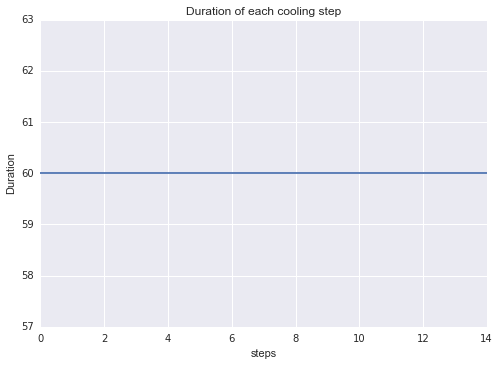

Best AIC: -417.00768755959257
Best solution: (array([ 2,  7,  9, 12, 13, 14, 15, 16, 23, 24, 25]),)
Discovered at iteration 887


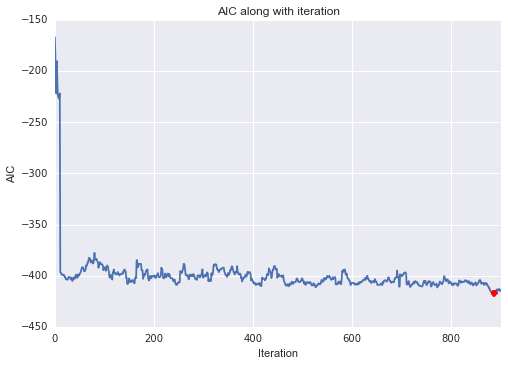

##########################################
############    CASE FOUR    #############
##########################################
The number of periods is 15
The temperature profile is [10.0, 9.0, 8.100000000000001, 7.290000000000001, 6.561, 5.9049000000000005, 5.3144100000000005, 4.7829690000000005, 4.304672100000001, 3.874204890000001, 3.486784401000001, 3.138105960900001, 2.824295364810001, 2.5418658283290005, 2.287679245496101]


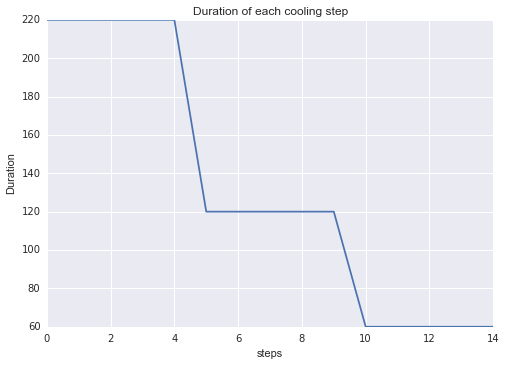

Best AIC: -415.56814648979594
Best solution: (array([ 2,  7,  9, 11, 12, 13, 14, 15, 24, 26]),)
Discovered at iteration 1928


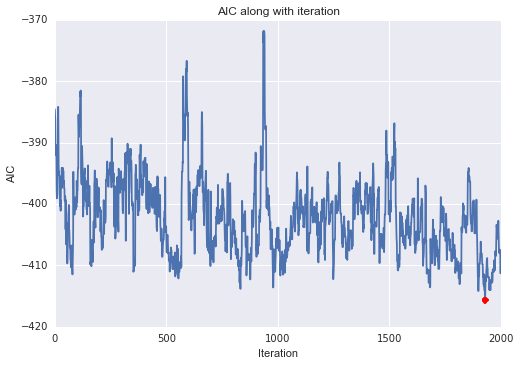

##########################################
############    CASE FIVE    #############
##########################################
The number of periods is 15
The temperature profile is [1.0, 0.9, 0.81, 0.7290000000000001, 0.6561, 0.5904900000000001, 0.531441, 0.4782969000000001, 0.4304672100000001, 0.3874204890000001, 0.3486784401000001, 0.31381059609000006, 0.2824295364810001, 0.2541865828329001, 0.2287679245496101]


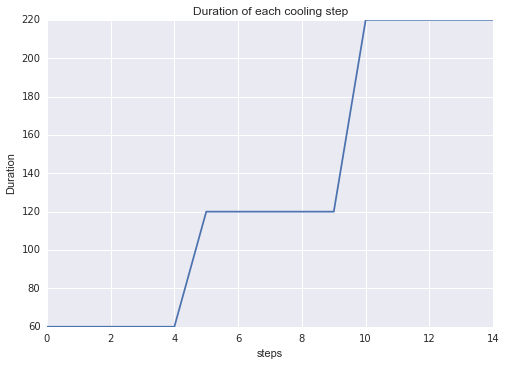

Best AIC: -417.31954870904354
Best solution: (array([ 0,  2,  5,  7,  9, 12, 13, 14, 15, 18, 23, 24, 25]),)
Discovered at iteration 279


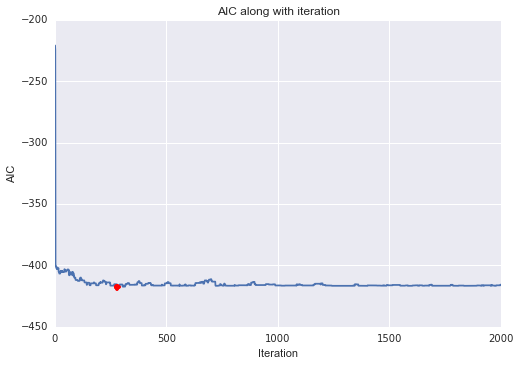

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sy
    

# load dataset
baseball = pd.read_table('../data/textbook/baseball.dat', sep='\s+')

predictors = baseball.copy()
logsalary = predictors.pop('salary').apply(np.log)
nrows, ncols = predictors.shape

########## Prob 1. ##########
##### Part One #####
print('##########################################')
print('##########################################')
print('############     PART ONE    #############')
print('##########################################')
print('##########################################')
print('---------------------------------------------------------------------------------')
print('---------------------------      Part A      ------------------------------------')
print('---------------------------------------------------------------------------------')
# Test of the performance of SA resulting from different temperatures and durations#
def SA_test(tau_start, iterPoints):
    
    # def AIC
    aic = lambda g: g.nobs * np.log((g.resid**2).sum()/g.nobs) + 2*len(g.beta)


    # number of steps
    periods = 15
    # number of test in each step
    iter_1, iter_2, iter_3 = iterPoints
    cooling = [iter_1]*int(periods/3) + [iter_2]*int(periods/3) + [iter_3]*int(periods/3)

    tau = [tau_start]*periods
    aic_values = []

    solution_current = solution_best = np.random.binomial(1, 0.5, ncols).astype(bool)
    solution_vars = predictors[predictors.columns[solution_current]]

    g = pd.ols(y=logsalary, x=solution_vars)
    aic_best = aic(g)
    aic_values.append(aic_best)


    # Cooling schedule
    tau = [tau_start * 0.9**i for i in range(15)]


    ### Simulated Anealing Process ###
    for j in range(periods):
    
        for i in range(cooling[j]):
        
            # Random change 1-neighborhood
            flip = np.random.randint(0, ncols)
            solution_current[flip] = not solution_current[flip]
        
            # the flipped solution variables
            solution_vars = predictors[predictors.columns[solution_current]]
        
            g = pd.ols(y=logsalary, x=solution_vars)
            aic_step = aic(g)
            alpha = min(1, np.exp((aic_values[-1] - aic_step)/tau[j]))
        
            if ((aic_step < aic_values[-1]) or (np.random.uniform() < alpha)):
                # Accept proposed solution
                aic_values.append(aic_step)
                if aic_step < aic_best:
                    # Replace previous best with this one
                    aic_best = aic_step
                    solution_best = solution_current.copy()
            else:
                # Revert solution
                solution_current[flip] = not solution_current[flip]
                aic_values.append(aic_values[-1])
            

    print('The number of periods is {0}'.format(periods))
    print('The temperature profile is {0}'.format(tau))
    
    plt.plot(cooling)
    plt.xlabel('steps')
    plt.ylabel('Duration')
    plt.title('Duration of each cooling step')
    plt.show()


    plt.plot(aic_values)
    plt.xlim(0, len(aic_values))
    plt.xlabel('Iteration')
    plt.ylabel('AIC')

    print('Best AIC: {0}\nBest solution: {1}\nDiscovered at iteration {2}'.format(aic_best, 
                np.where(solution_best==True),
                np.where(aic_values==aic_best)[0][0]))

    plt.plot(np.where(aic_values==aic_best)[0][0], aic_best, 'ro')
    plt.title('AIC along with iteration')
    plt.show()



print('##########################################')
print('############     CASE ONE    #############')
print('##########################################')

tau_start = 10
iterPoints = [60, 120, 220]
SA_test(tau_start, iterPoints)

print('##########################################')
print('############     CASE TWO    #############')
print('##########################################')

tau_2 = 50
iters_2 = [60, 120, 220]
SA_test(tau_2, iters_2)

print('##########################################')
print('############    CASE THREE   #############')
print('##########################################')

tau_3 = 10
iters_3 = [60, 60, 60]
SA_test(tau_3, iters_3)

print('##########################################')
print('############    CASE FOUR    #############')
print('##########################################')

tau_4 = 10
iters_4 = [220, 120, 60]
SA_test(tau_4, iters_4)


print('##########################################')
print('############    CASE FIVE    #############')
print('##########################################')

tau_5 = 1
iters_5 = [60, 120, 220]
SA_test(tau_5, iters_5)





---------------------------------------------------------------------------------
---------------------------      Part B      ------------------------------------
---------------------------------------------------------------------------------
##########################################
############     CASE ONE    #############
##########################################
The number of periods is 15
The temperature profile is [10.0, 9.0, 8.100000000000001, 7.290000000000001, 6.561, 5.9049000000000005, 5.3144100000000005, 4.7829690000000005, 4.304672100000001, 3.874204890000001, 3.486784401000001, 3.138105960900001, 2.824295364810001, 2.5418658283290005, 2.287679245496101]


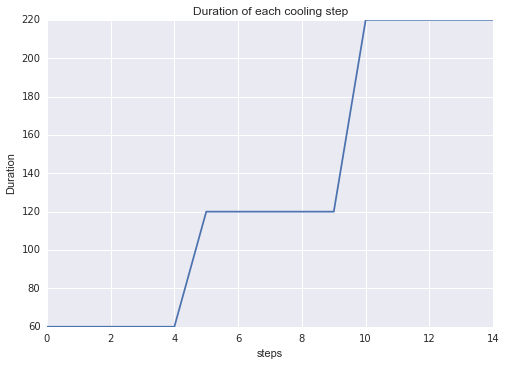

Best AIC: -415.8833827383061
Best solution: (array([ 0,  2,  7,  9, 12, 13, 14, 15, 19, 21, 23, 24, 25]),)
Discovered at iteration 1901


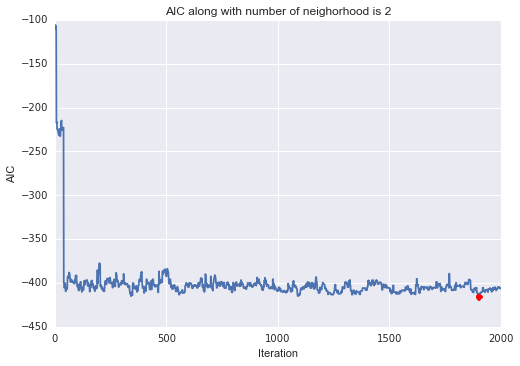

##########################################
############     CASE TWO    #############
##########################################
The number of periods is 15
The temperature profile is [10.0, 9.0, 8.100000000000001, 7.290000000000001, 6.561, 5.9049000000000005, 5.3144100000000005, 4.7829690000000005, 4.304672100000001, 3.874204890000001, 3.486784401000001, 3.138105960900001, 2.824295364810001, 2.5418658283290005, 2.287679245496101]


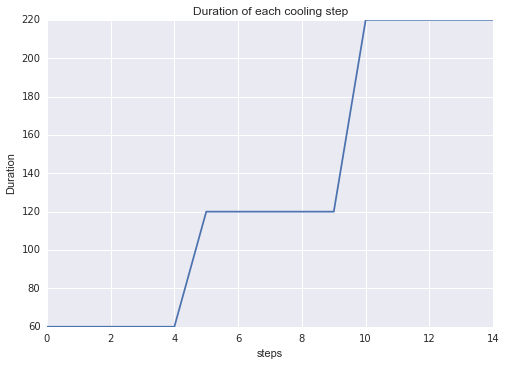

Best AIC: -415.26031402110675
Best solution: (array([ 1,  2,  5,  7,  8,  9, 12, 13, 14, 15, 16, 17, 23, 24, 26]),)
Discovered at iteration 1749


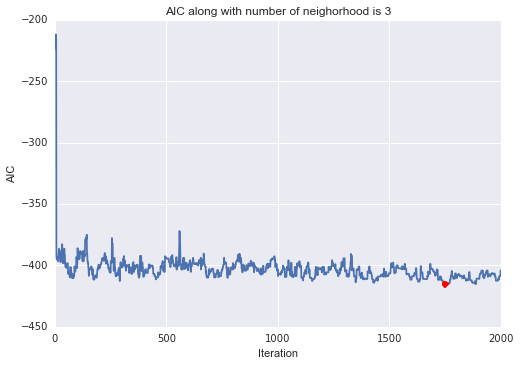

In [7]:

print('---------------------------------------------------------------------------------')
print('---------------------------      Part B      ------------------------------------')
print('---------------------------------------------------------------------------------')


def SA_nb_2(tau_start, iterPoints, num_nb = 2):
    
    # def AIC
    aic = lambda g: g.nobs * np.log((g.resid**2).sum()/g.nobs) + 2*len(g.beta)


    # number of steps
    periods = 15
    # number of test in each step
    iter_1, iter_2, iter_3 = iterPoints
    cooling = [iter_1]*int(periods/3) + [iter_2]*int(periods/3) + [iter_3]*int(periods/3)

    tau = [tau_start]*periods
    aic_values = []

    solution_current = solution_best = np.random.binomial(1, 0.5, ncols).astype(bool)
    solution_vars = predictors[predictors.columns[solution_current]]

    g = pd.ols(y=logsalary, x=solution_vars)
    aic_best = aic(g)
    aic_values.append(aic_best)


    # Cooling schedule
    tau = [tau_start * 0.9**i for i in range(15)]


    ### Simulated Anealing Process ###
    for j in range(periods):
    
        for i in range(cooling[j]):
        
            # Random change 1-neighborhood
            flip = np.random.randint(0, ncols, size = num_nb)
            if num_nb == 2:
                solution_current[flip[0]] = not solution_current[flip[0]]
                solution_current[flip[1]] = not solution_current[flip[1]]
            
            if num_nb == 3:
                solution_current[flip[0]] = not solution_current[flip[0]]
                solution_current[flip[1]] = not solution_current[flip[1]]
                solution_current[flip[2]] = not solution_current[flip[2]]
            
            #[solution_current[flip] = not solution_current[flip]]
            
            # the flipped solution variables
            solution_vars = predictors[predictors.columns[solution_current]]
        
            g = pd.ols(y=logsalary, x=solution_vars)
            aic_step = aic(g)
            alpha = min(1, np.exp((aic_values[-1] - aic_step)/tau[j]))
        
            if ((aic_step < aic_values[-1]) or (np.random.uniform() < alpha)):
                # Accept proposed solution
                aic_values.append(aic_step)
                if aic_step < aic_best:
                    # Replace previous best with this one
                    aic_best = aic_step
                    solution_best = solution_current.copy()
            else:
                # Revert solution
                if num_nb == 2:
                    solution_current[flip[0]] = not solution_current[flip[0]]
                    solution_current[flip[1]] = not solution_current[flip[1]]
            
                if num_nb == 3:
                    solution_current[flip[0]] = not solution_current[flip[0]]
                    solution_current[flip[1]] = not solution_current[flip[1]]
                    solution_current[flip[2]] = not solution_current[flip[2]]
                aic_values.append(aic_values[-1])
            

    print('The number of periods is {0}'.format(periods))
    print('The temperature profile is {0}'.format(tau))
    
    plt.plot(cooling)
    plt.xlabel('steps')
    plt.ylabel('Duration')
    plt.title('Duration of each cooling step')
    plt.show()


    plt.plot(aic_values)
    plt.xlim(0, len(aic_values))
    plt.xlabel('Iteration')
    plt.ylabel('AIC')

    print('Best AIC: {0}\nBest solution: {1}\nDiscovered at iteration {2}'.format(aic_best, 
                np.where(solution_best==True),
                np.where(aic_values==aic_best)[0][0]))

    plt.plot(np.where(aic_values==aic_best)[0][0], aic_best, 'ro')
    plt.title('AIC along with number of neighorhood is {0}'.format(num_nb))
    plt.show()

    

    
print('##########################################')
print('############     CASE ONE    #############')
print('##########################################')

tau_start = 10
iterPoints = [60, 120, 220]
SA_nb_2(tau_start, iterPoints, 2)

print('##########################################')
print('############     CASE TWO    #############')
print('##########################################')

tau_start = 10
iterPoints = [60, 120, 220]
SA_nb_2(tau_start, iterPoints, 3)



##########################################
##########################################
############     PART TWO    #############
##########################################
##########################################
##########################################
############     CASE ONE    #############
##########################################


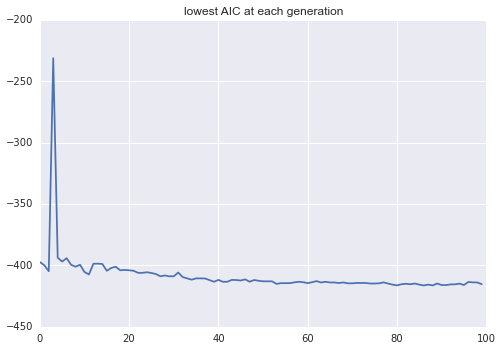

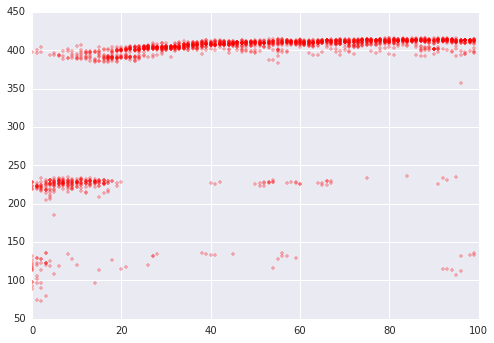

##########################################
############     CASE TWO    #############
##########################################


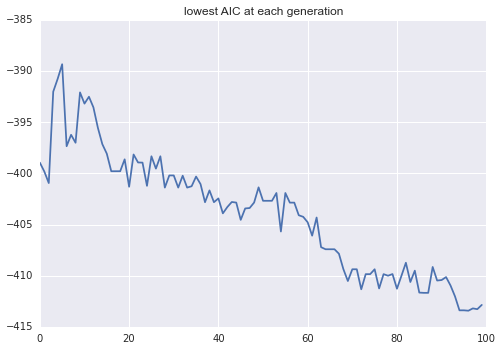

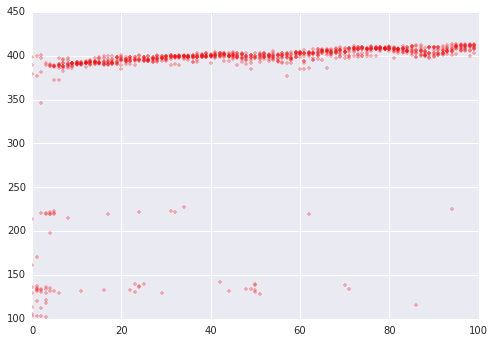

##########################################
############     CASE THREE    #############
##########################################


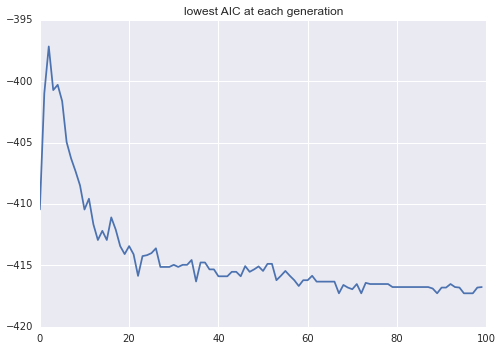

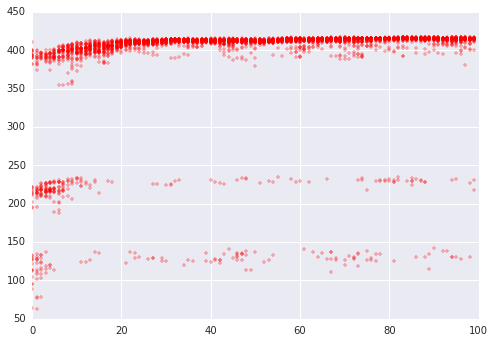

##########################################
############     CASE FOUR    #############
##########################################


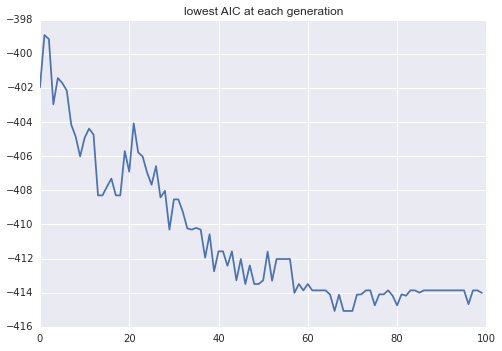

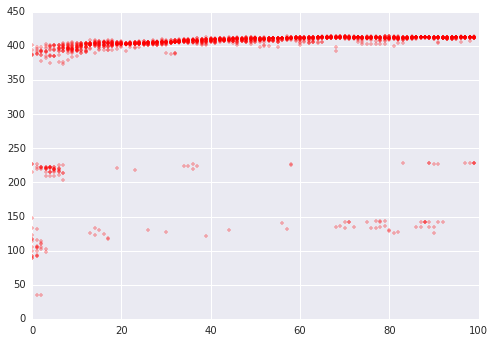

##########################################
############     CASE Five   #############
##########################################


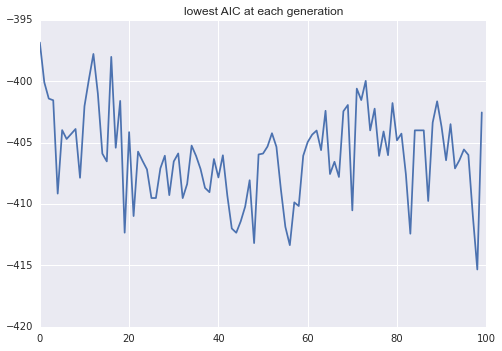

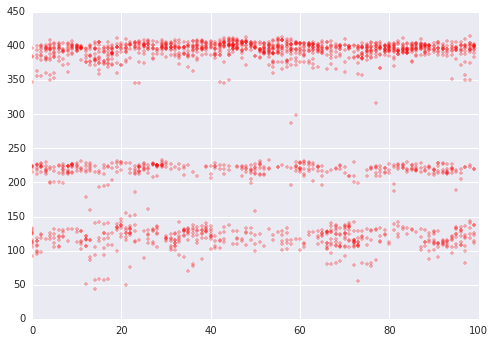

##########################################
############     CASE SIX    #############
##########################################


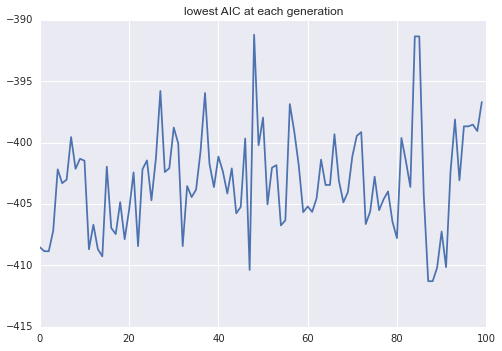

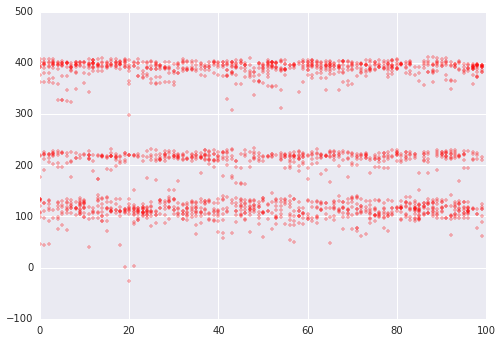

In [8]:


##### Part Two #####
print('##########################################')
print('##########################################')
print('############     PART TWO    #############')
print('##########################################')
print('##########################################')

pop_size = 20
iterations = 100
mutation_rate = .02

aic = lambda g: g.nobs * np.log((g.resid**2).sum()/g.nobs) + 2*len(g.beta)


def testGA(pop_size, mutation_rate):
   
    aic_best = []
    best_solution = []
    aic_history = []

    # Initialize genotype
    current_gen = np.random.binomial(1, 0.5, pop_size*ncols).reshape((pop_size, ncols))

    def calculate_fitness(aic_values):
        P = len(aic_values)
        aic_rank = (-aic_values).argsort().argsort()+1.
        return 2.*aic_rank/(P*(P+1.))


    for i in range(iterations):
    
        # Get phenotype
        current_phe = [predictors[predictors.columns[g.astype(bool)]] for g in current_gen]
        # Calculate AIC
        current_aic = np.array([aic(pd.ols(y=logsalary, x=x)) for x in current_phe])
        # Get lowest AIC
        aic_best.append(current_aic[np.argmin(current_aic)])
        best_solution.append(current_gen[np.argmin(current_aic)])
    
        # Calculate fitness according to AIC rank
        fitness = calculate_fitness(current_aic)
    
        # Choose first parents according to fitness
        moms = np.random.choice(range(pop_size), size=int(pop_size/2), p=fitness)
        # Choose second parents randomly
        dads = np.random.choice(range(pop_size), size=int(pop_size/2))
        
        next_gen = []
        for x,y in zip(current_gen[moms], current_gen[dads]):
            # Crossover
            cross = np.random.randint(0, ncols)
            child1 = np.r_[x[:cross], y[cross:]]
            child2 = np.r_[y[:cross], x[cross:]]
            # Mutate
            m1 = np.random.binomial(1, mutation_rate, size=ncols).astype(bool)
            child1[m1] = abs(child1[m1]-1)
            m2 = np.random.binomial(1, mutation_rate, size=ncols)
            child2[m2] = abs(child1[m2]-1)
            next_gen += [child1, child2]
        
        # Increment generation
        current_gen = np.array(next_gen)
    # Store AIC values
        aic_history.append(current_aic)
    
    plt.plot(aic_best)
    plt.title('lowest AIC at each generation')
    plt.show()

    for i,x in enumerate(aic_history):
        plt.plot(np.ones(len(x))*i, -x, 'r.', alpha=0.3)
    plt.show()


    
print('##########################################')
print('############     CASE ONE    #############')
print('##########################################')

pop_size = 20
mutation_rate = .02
testGA(pop_size, mutation_rate)
    
    
    
print('##########################################')
print('############     CASE TWO    #############')
print('##########################################')

pop_size = 10
mutation_rate = .02
testGA(pop_size, mutation_rate)

print('##########################################')
print('############     CASE THREE    #############')
print('##########################################')

pop_size = 40
mutation_rate = .02
testGA(pop_size, mutation_rate)

print('##########################################')
print('############     CASE FOUR    #############')
print('##########################################')

pop_size = 20
mutation_rate = .01
testGA(pop_size, mutation_rate)

print('##########################################')
print('############     CASE Five   #############')
print('##########################################')

pop_size = 20
mutation_rate = .2
testGA(pop_size, mutation_rate)
    

print('##########################################')
print('############     CASE SIX    #############')
print('##########################################')

pop_size = 20
mutation_rate = .5
testGA(pop_size, mutation_rate)
    
    

In [9]:

print(np.random.randint(0, ncols, size = 2))

[ 9 21]


## Question 3

Use the combinatorial optimization method of your choice to obtain a solution to the traveling salesman problem for the Brazilian cities described in the lecture notes, using minimum total distance as the criterion. Use the the first city listed in the dataset as "home" (*i.e.* the trip must start and end there. I will award 5 bonus points to the best solution!

## Solutions:

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

def parse_latlon(x):
    d, m, s = map(float, x.split(':'))
    ms = m/60. + s/3600.
    if d<0:
        return d - ms
    return d + ms

cities =  pd.read_csv('../data/brasil_capitals.txt', 
                      names=['city','lat','lon'])[['lat','lon']].applymap(parse_latlon)


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:37: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:38: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:82: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:83: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


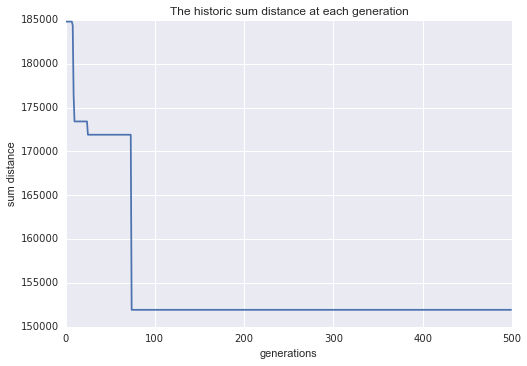

In [11]:
# construct the distance matrix 
def distAB(x1, y1, x2, y2):
    r = 6300
    dX, dY = x2 - x1, y2 - y1
    alpha = (math.sin(dX/2))**2 + math.cos(x1)*math.cos(x2)*(math.sin(dY/2))**2
    return 2 * math.atan2(math.sqrt(alpha), math.sqrt(1 - alpha)) * r

n = len(cities)                 
dist = np.empty((n, n))
 
for i in range(n):
    for j in range(n):
        dist[i,j] = distAB(cities.lat[i],cities.lon[i], cities.lat[j], cities.lon[j])

# inital setting about the GA processing       
gen_cur = 0
pop_size = 500
gen_max = 500

# population initialization

def pop_init(size):
    i = 0
    pop = np.empty((size, n))
    while i<size:
        pop[i,:] = np.random.permutation(range(1, n+1)) 
        i += 1
    return pop

# Calculate the fitness of each chromosome
def calculate_fitness(population):
    fitness = np.empty(len(population), dtype=float)
    for j in range(len(population)):
        length = 0
        chromosome = population[j,:]
        for i in range(len(chromosome)-1):
            length += dist[chromosome[i]-1, chromosome[i+1]-1]
        length += dist[chromosome[i+1]-1, 0]
        fitness[j] = 1/length
    return fitness/sum(fitness)

crossover_rate = 0.95
mutation_rate = 0.10

# PMX crossover
def PMX(mom, pap):
    pos = np.random.randint(0, n, 2)
    s, t = min(pos), max(pos)

    s1, s2 = mom[0, s:t], pap[0, s:t]
    
    
    for i in range(len(s1)):
        if s1[i]!=s2[i]:
            location_s1 = np.where(mom==s1[i])
            location_s2 = np.where(mom==s2[i])
            tmp = mom[location_s1]
            mom[location_s1] = s2[i]
            mom[location_s2] = tmp
            location_s1 = np.where(pap==s2[i])
            location_s2 = np.where(pap==s1[i])
            tmp = pap[location_s1]
            pap[location_s1]=s1[i]
            pap[location_s2]=tmp
    return mom, pap


# Genetic algorithm mutation
def mutation(chromosome):
    pos = np.random.randint(0, n, 2)
    while pos[0] == pos[1]:
        pos = np.random.randint(0, n, 2)
    tmp = chromosome[pos[0]]
    chromosome[pos[0]] = chromosome[pos[1]]
    chromosome[pos[1]] = tmp
    return chromosome
    

def distSum(chromosome):
    length = 0
    for i in range(chromosome.size-1):
        length += dist[chromosome[0,i]-1, chromosome[0,i+1]-1]
    length += dist[chromosome[0,i+1]-1, 0]
    return length


pop = pop_init(pop_size)
# fitness evaluation
fitness = calculate_fitness(pop)
best_fitness = max(fitness)
best_chromosome = pop[np.where(fitness == best_fitness)]
history = np.ones(gen_max)
while gen_cur < gen_max:
#    if gen_cur % 50 == 0:
#        print ('This is the {0}-th iteration'.format(k))       
    p = fitness.copy()
    for i in range(len(fitness)):
        if i == 0:
            p[i] = p[i]
        else:
            p[i] = p[i]+p[i-1]
    
    # crossover
    for j in range(len(pop)): 
        if np.random.rand()<crossover_rate:
            val1 = np.random.rand()
            chrome1 = np.where(p>val1)
            pos1 = [x[0] for x in chrome1]
            
            val2 = np.random.rand() 
            chrome2 = np.where(p>val2)
            pos2 = [x[0] for x in chrome2]
            
            offspring = list(PMX(pop[pos1,:], pop[pos2, :]))
            pop[pos1, :] = offspring[0]
            pop[pos2, :] = offspring[1]
            
        # mutation
        if np.random.rand() < mutation_rate:
            pos = np.random.randint(0, pop_size)
            pop[pos, :] = mutation(pop[pos,:])

    fitness = calculate_fitness(pop)
    best_index = np.where(fitness == max(fitness))
    if max(fitness) > best_fitness:
        best_fitness = max(fitness)
        best_chromosome = pop[best_index]
    
    history[gen_cur] = distSum(best_chromosome)        
    gen_cur += 1

plt.title('The historic sum distance at each generation')
plt.plot(range(gen_max), history)
plt.xlabel('generations')
plt.ylabel('sum distance')
plt.show()






In [12]:

nrows, ncols = cities.shape
points = []
for i in range(nrows):
    points.append([cities.lat[i], cities.lon[i]])

## Question 4

Suppose $y$ has a binomial distribution with parameters $n$ and $p$, and we are interested in the log-odds value $\theta = \log(p/(1 − p))$. Our prior for $\theta$ is that $\theta \sim N(\mu, \sigma^2)$. It follows that the posterior density of $\theta$ is given, up to a proportionality constant, by:

$$g(\theta | y) \propto \frac{\exp(y\theta)}{(1 + exp(\theta))^n} \exp\left[\frac{-(\theta − \mu)^2}{2\sigma^2}\right]$$

For example, suppose we are interested in learning about the probability that a possibly-biased coin lands heads when tossed. *A priori* we believe that the coin is fair, so we assign $\theta$ a $N(0,.25)$ prior. We toss the coin $n = 5$ times and obtain $y = 5$ heads.

1. Using a normal approximation to the posterior density, compute the probability that the coin is biased toward heads (i.e., that θ is posi- tive).
2. Using the prior density as a proposal density, design a rejection algo- rithm for sampling from the posterior distribution. Using simulated draws from your algorithm, approximate the probability that the coin is biased toward heads.
3. Using the prior density as a proposal density, simulate values from the posterior distribution using the SIR algorithm. Approximate the probability that the coin is biased toward heads.

## Solutions:

In [13]:
########## Prob 1. ##########
##### Part One #####
print('##########################################')
print('##########################################')
print('############     PART ONE    #############')
print('##########################################')
print('##########################################')

from scipy.optimize import fmin_bfgs
from scipy.stats import norm
# obs.
n = 5
y = 5
mu = 0
std = 0.5

def log_post(theta):
    pdf = y * theta - (theta - mu) ** 2 + n * (1 + np.exp(theta)) - 2 * std ** 2

    return -1 * pdf

theta_0 = 0.5

opt = fmin_bfgs(log_post, theta_0, full_output = True)

mu, var = opt[0], opt[3]

prob = (1 - norm.cdf(0, mu, np.sqrt(var)))[0, 0]

print ('The probability of coin toward heads is {0}'.format(prob))

opt



##########################################
##########################################
############     PART ONE    #############
##########################################
##########################################
         Current function value: -14.993606
         Iterations: 0
         Function evaluations: 48
         Gradient evaluations: 12
The probability of coin toward heads is 0.6914624612740131


(array([ 0.5]),
 array([-14.99360635]),
 array([-12.24360633]),
 array([[1]]),
 48,
 12,
 2)

In [15]:
########## Prob 2. ##########

print('##########################################')
print('##########################################')
print('############     PART TWO    #############')
print('##########################################')
print('##########################################')

def log_post(theta):
    return 5*theta - 5*np.log(1+np.exp(theta)) - 8*theta**2

def log_prop(theta):
    return np.log(1/(0.25*np.sqrt(2*np.pi)))-8*theta**2
    
def calc_diff(theta):
    return -1*(log_post(theta) - log_prop(theta))

theta_0 = 0.25 
opt = fmin_bfgs(calc_diff, theta_0, full_output=True)
c = opt[1]

def probRS(c):
    sampleSize = 100000
    numAccept = 0
    numTheta=0
    for i in range(sampleSize):
        theta =  np.random.normal(0, 0.25)
        
        gvals = log_prop(theta)
        fvals = log_post(theta)
        
        p = np.exp(c + fvals - gvals)
        
        if not(np.random.random()>=p):
            
            numAccept += 1
            
            if theta>0:
                
                numTheta += 1
    
    return float(numTheta)/numAccept

prob = probRS(c)

print ('The probability of coin toward heads is {0}'.format(prob))


##########################################
##########################################
############     PART TWO    #############
##########################################
##########################################
Optimization terminated successfully.
         Current function value: 0.467357
         Iterations: 16
         Function evaluations: 54
         Gradient evaluations: 18
The probability of coin toward heads is 0.7257031467557783


In [16]:
########## Prob 3. ##########

print('##########################################')
print('##########################################')
print('############   PART THREE   ##############')
print('##########################################')
print('##########################################')


from scipy.stats import norm
import numpy as np

def log_post(theta):
    return 5*theta - 5*np.log(1+np.exp(theta)) - 8*theta**2

def log_prop(theta):
    return np.log(1/(0.25*np.sqrt(2*np.pi)))-8*theta**2

theta = np.random.normal(0, 0.25, 10000) 

f_theta = log_post(theta)
q_theta = log_prop(theta)

w = np.exp(f_theta - q_theta - max(f_theta - q_theta))

pSIR = w/w.sum()

size = 10000

thetaSIR = theta[np.random.choice(range(len(theta)), size=size, p=pSIR)]

t = (thetaSIR > 0)*1

prob = float(t.sum())/size

print ('The probability of coin toward heads is {0}'.format(prob))


##########################################
##########################################
############   PART THREE   ##############
##########################################
##########################################
The probability of coin toward heads is 0.7356
